# Step 1 : -Data import & library

In [69]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import datetime  
from sklearn.svm import SVC  # supervised learning methods used for classification, regression 
import joblib  #Joblib is a set of tools to provide lightweight pipelining in Python (Avoid computing twice the same thing)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
                                    # GridSearchCV - Implements a “fit” and a “score” method
                                    # train_test_split - Split arrays or matrices into random train and test subsets
                                    # cross_val_score - Evaluate a score by cross-validation
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report
                                    # Differnt metrics to evaluate the model 
import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

import seaborn as sn
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches
from PIL import  Image
import seaborn as sns#visualization
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [70]:
import os 
os.chdir(r"C:\Users\admin\Desktop\Machine Learning\Support Vector Machine\Problem 2") 

In [71]:
data=pd.read_csv("wine.csv")

In [72]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


# Step 2 : - Data Pre-Processing



## Data Structure or type 

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Checking Missing Value

In [74]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

# Outlier Treatment Process

<AxesSubplot:>

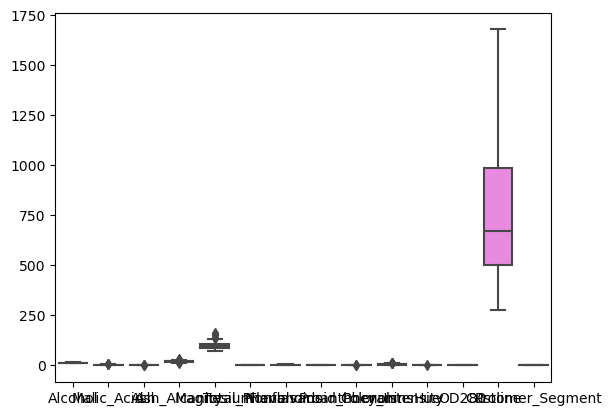

In [75]:
sns.boxplot(data=data)

In [76]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [77]:
for i in data:
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    for j in data[i]:
        if j > upper_limit:
            data[i]=np.where(data[i] > upper_limit,upper_limit,data[i]) # upper limit
        else:
            data[i]=np.where(data[i] < lower_limit,lower_limit,data[i]) # lower limit

<AxesSubplot:>

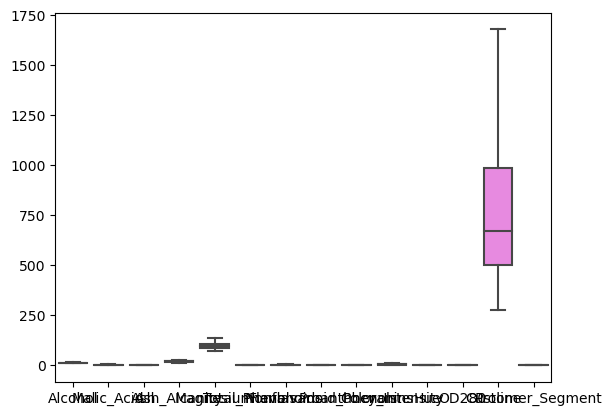

In [78]:
sns.boxplot(data=data)

In [79]:
data.Customer_Segment.value_counts()

2.0    71
1.0    59
3.0    48
Name: Customer_Segment, dtype: int64

## Removing Irrelavent Variable

In [80]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.330435,2.366721,19.478090,99.483146,2.295112,2.029270,0.361854,1.586067,5.038146,0.956979,2.611685,746.893258,1.938202
std,0.811827,1.100173,0.263705,3.287757,13.414186,0.625851,0.998859,0.124453,0.558153,2.260881,0.227095,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.688750,10.750000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.302500,3.078750,27.950000,135.500000,3.880000,5.080000,0.660000,3.000000,10.670000,1.626250,4.000000,1680.000000,3.000000


## Taking subset data of Number 

In [81]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0


In [82]:
# #Employee Numeric columns
data_num = data[data.select_dtypes(include=[np.number]).columns.tolist()]
data_num.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0


## Combine to Dataset

In [83]:
data_combined = pd.concat([data_num],axis=1)

In [84]:
data_combined.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1.0


# Step 4: Data Partition

In [85]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = data_combined.drop(['Customer_Segment'],axis=1)  # fgood 
y = data_combined['Customer_Segment']

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=2321)

# Step 5:Modelling with GridSearch

In [86]:
# Define Model parameters to tune
model_parameters = {
        'kernel':['linear'], # calculation
        'C':[1, 10], #cost complexity or penalty 
        'gamma': [0.0001]
    }

In [87]:
# Gridsearch the parameters to find the best parameters. 
model = SVC(probability=True)  # Support vector classifier 

gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5,  # times 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='accuracy')

gscv.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.0001], 'kernel': ['linear']},
             scoring='accuracy', verbose=1)

In [88]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}


In [89]:
# Re-fit the model with the best parameters
final_model = SVC(**gscv.best_params_)
final_model.fit(X_train, y_train)

SVC(C=1, gamma=0.0001, kernel='linear')

# Manual Model 

In [90]:
from sklearn.svm import SVC  # Support Vector Classifier
#from sklearn.svm import LinearSVC
model = SVC(kernel="linear")  # if we use linear then only we get support_vector
model.fit(X_train, y_train) #Variable = fgood ( defaulter =1 , non-defaulter = 0)

SVC(kernel='linear')

In [91]:
model.support_vectors_        #####this are support vector

array([[1.30500e+01, 1.65000e+00, 2.55000e+00, 1.80000e+01, 9.80000e+01,
        2.45000e+00, 2.43000e+00, 2.90000e-01, 1.44000e+00, 4.25000e+00,
        1.12000e+00, 2.51000e+00, 1.10500e+03],
       [1.30700e+01, 1.50000e+00, 2.10000e+00, 1.55000e+01, 9.80000e+01,
        2.40000e+00, 2.64000e+00, 2.80000e-01, 1.37000e+00, 3.70000e+00,
        1.18000e+00, 2.69000e+00, 1.02000e+03],
       [1.28500e+01, 1.60000e+00, 2.52000e+00, 1.78000e+01, 9.50000e+01,
        2.48000e+00, 2.37000e+00, 2.60000e-01, 1.46000e+00, 3.93000e+00,
        1.09000e+00, 3.63000e+00, 1.01500e+03],
       [1.30500e+01, 2.05000e+00, 3.07875e+00, 2.50000e+01, 1.24000e+02,
        2.63000e+00, 2.68000e+00, 4.70000e-01, 1.92000e+00, 3.58000e+00,
        1.13000e+00, 3.20000e+00, 8.30000e+02],
       [1.32400e+01, 3.98000e+00, 2.29000e+00, 1.75000e+01, 1.03000e+02,
        2.64000e+00, 2.63000e+00, 3.20000e-01, 1.66000e+00, 4.36000e+00,
        8.20000e-01, 3.00000e+00, 6.80000e+02],
       [1.32400e+01, 2.59000e+

In [92]:
np.round(model.coef_)                 ######### Coefficient value   ( beta's value)

array([[ 1.,  1.,  1., -0.,  0., -0.,  0.,  0., -0.,  1., -0.,  0.,  0.],
       [ 0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.],
       [-1., -1., -0., -0., -0.,  0.,  1.,  0.,  0., -1.,  0.,  0., -0.]])

In [93]:
np.round(model.intercept_)   ###### bias  ( intercept`)

array([-18.,  -4.,  18.])

# Step 6 : Predictions on Train Dataset

In [94]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0,1.0
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0,2.0
147,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0,3.0
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,1.0
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,2.0


In [95]:
train['Prediction']=model.predict(X_train)
train.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Prediction
44,13.05,1.77,2.10,17.0,107.0,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885.0,1.0,1.0
84,11.84,0.89,2.58,18.0,94.0,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520.0,2.0,2.0
147,12.87,4.61,2.48,21.5,86.0,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625.0,3.0,3.0
21,12.93,3.80,2.65,18.6,102.0,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770.0,1.0,1.0
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0,2.0,2.0


# Step 7 : Model Performance Metrics

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Prediction'],train['Customer_Segment'])
print(confusion_matrix)

[[38  0  0]
 [ 1 52  1]
 [ 0  0 32]]


In [97]:
Accuracy_Train=((39+52+32)/(124)*100)
print(Accuracy_Train)

99.19354838709677


In [98]:
from sklearn.metrics import classification_report
print(classification_report(train['Customer_Segment'], train['Prediction']))

              precision    recall  f1-score   support

         1.0       1.00      0.97      0.99        39
         2.0       0.96      1.00      0.98        52
         3.0       1.00      0.97      0.98        33

    accuracy                           0.98       124
   macro avg       0.99      0.98      0.98       124
weighted avg       0.98      0.98      0.98       124



* Model is Good fit on Train dataset

# Step 8 : Predictions on Test Dataset

In [99]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.62625,2.87,407.0,2.0
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91000,2.05,550.0,3.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75000,1.51,650.0,3.0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65000,2.00,855.0,3.0
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74000,1.80,750.0,3.0


In [100]:
test['Prediction']=model.predict(X_test)
test.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment,Prediction
115,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.62625,2.87,407.0,2.0,2.0
143,13.62,4.95,2.35,20.0,92.0,2.00,0.80,0.47,1.02,4.40,0.91000,2.05,550.0,3.0,3.0
134,12.51,1.24,2.25,17.5,85.0,2.00,0.58,0.60,1.25,5.45,0.75000,1.51,650.0,3.0,2.0
144,12.25,3.88,2.20,18.5,112.0,1.38,0.78,0.29,1.14,8.21,0.65000,2.00,855.0,3.0,3.0
168,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74000,1.80,750.0,3.0,3.0


# Step 9 : Model Performance Metrics on Test data 

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix( test['Prediction'],test['Customer_Segment'])
print(confusion_matrix)

[[20  0  0]
 [ 0 18  1]
 [ 0  1 14]]


In [102]:
Accuracy_test=((20+18+14)/(54)*100)
Accuracy_test

96.29629629629629

In [103]:
print(classification_report(test['Customer_Segment'], test['Prediction']))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       0.95      0.95      0.95        19
         3.0       0.93      0.93      0.93        15

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



* Model Performance on Test dataset is also good fit 

# Finished